### 2.4 Uncertainty estimates from classifiers

In [11]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split


In [6]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

# we rename the classes "blue" and "red" for illustration bpurposes:
y_named = np.array(["blue", "red"])[y]
print("Named Target shape: {}".format(y_named.shape))
print(y[0], y_named[0])
print(y[1], y_named[1])
print(y[2], y_named[2])

Data shape: (100, 2)
Target shape: (100,)
Named Target shape: (100,)
1 red
1 red
0 blue


In [7]:
print(X)

[[-0.37748684 -0.0400769 ]
 [ 0.02701955 -0.48423931]
 [-0.36118825 -1.4007017 ]
 [-0.68154165  0.00577195]
 [ 0.79966997 -0.1374838 ]
 [-0.44067409  0.65738634]
 [-0.51680069 -0.64905973]
 [-0.48984706 -0.07126104]
 [-0.24030273  0.4245925 ]
 [-0.15480597  0.3987051 ]
 [ 0.22202915 -0.56040775]
 [ 0.14845311 -0.83918918]
 [ 0.55447318  0.52619405]
 [ 0.73776469 -0.06026285]
 [ 0.56048402 -0.22169632]
 [-0.24288865 -0.81429088]
 [-1.16124083 -0.74556572]
 [ 0.77723853 -0.37259801]
 [-0.47721837 -0.37664926]
 [ 0.11550395  1.10356127]
 [ 0.58181291  0.19749795]
 [-0.85136464  0.13473314]
 [ 0.47159612 -0.34434378]
 [-0.0609338   0.20718973]
 [-0.72283227  0.43895304]
 [-0.38474582 -1.09366122]
 [ 0.13179551 -0.53591877]
 [-0.93195251 -0.462223  ]
 [ 0.41735023 -0.76677992]
 [-0.08532078 -0.77752591]
 [-0.07320389  0.79692206]
 [ 0.88178468 -0.17459954]
 [-0.00626974 -0.20708197]
 [ 0.15324214 -0.39398671]
 [ 0.16545985 -0.17406719]
 [ 0.33256209 -1.02184884]
 [ 0.86965498 -0.42679788]
 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### 2.4.1 The Decision Function
- decision_function 반환값
  - 주어진 데이터 포인트 샘플당 하나의 실수값 반환
  - 주어진 데이터 포인트가 양성 클래스인 1에 속한다고 믿는 정도
  - 반환값의 부호
    - 양수: 양성 클래스 (1)
    - 음수: 음성 클래스 (0)

In [12]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [15]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)))

Decision function:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662 -7.691  4.11   1.108  3.408
 -6.463  4.29   3.902 -1.2    3.662 -4.172 -1.23  -3.916  4.036  4.11
  4.11   0.657  2.698 -2.657 -1.868]


In [14]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [16]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
print(gbrt.classes_)
pred = gbrt.classes_[greater_zero]

# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

['blue' 'red']
pred is equal to predictions: True


In [17]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


- 왼쪽 그래프: 결정 경계
- 오른쪽 그래프: decision_function의 값을 색으로 표현

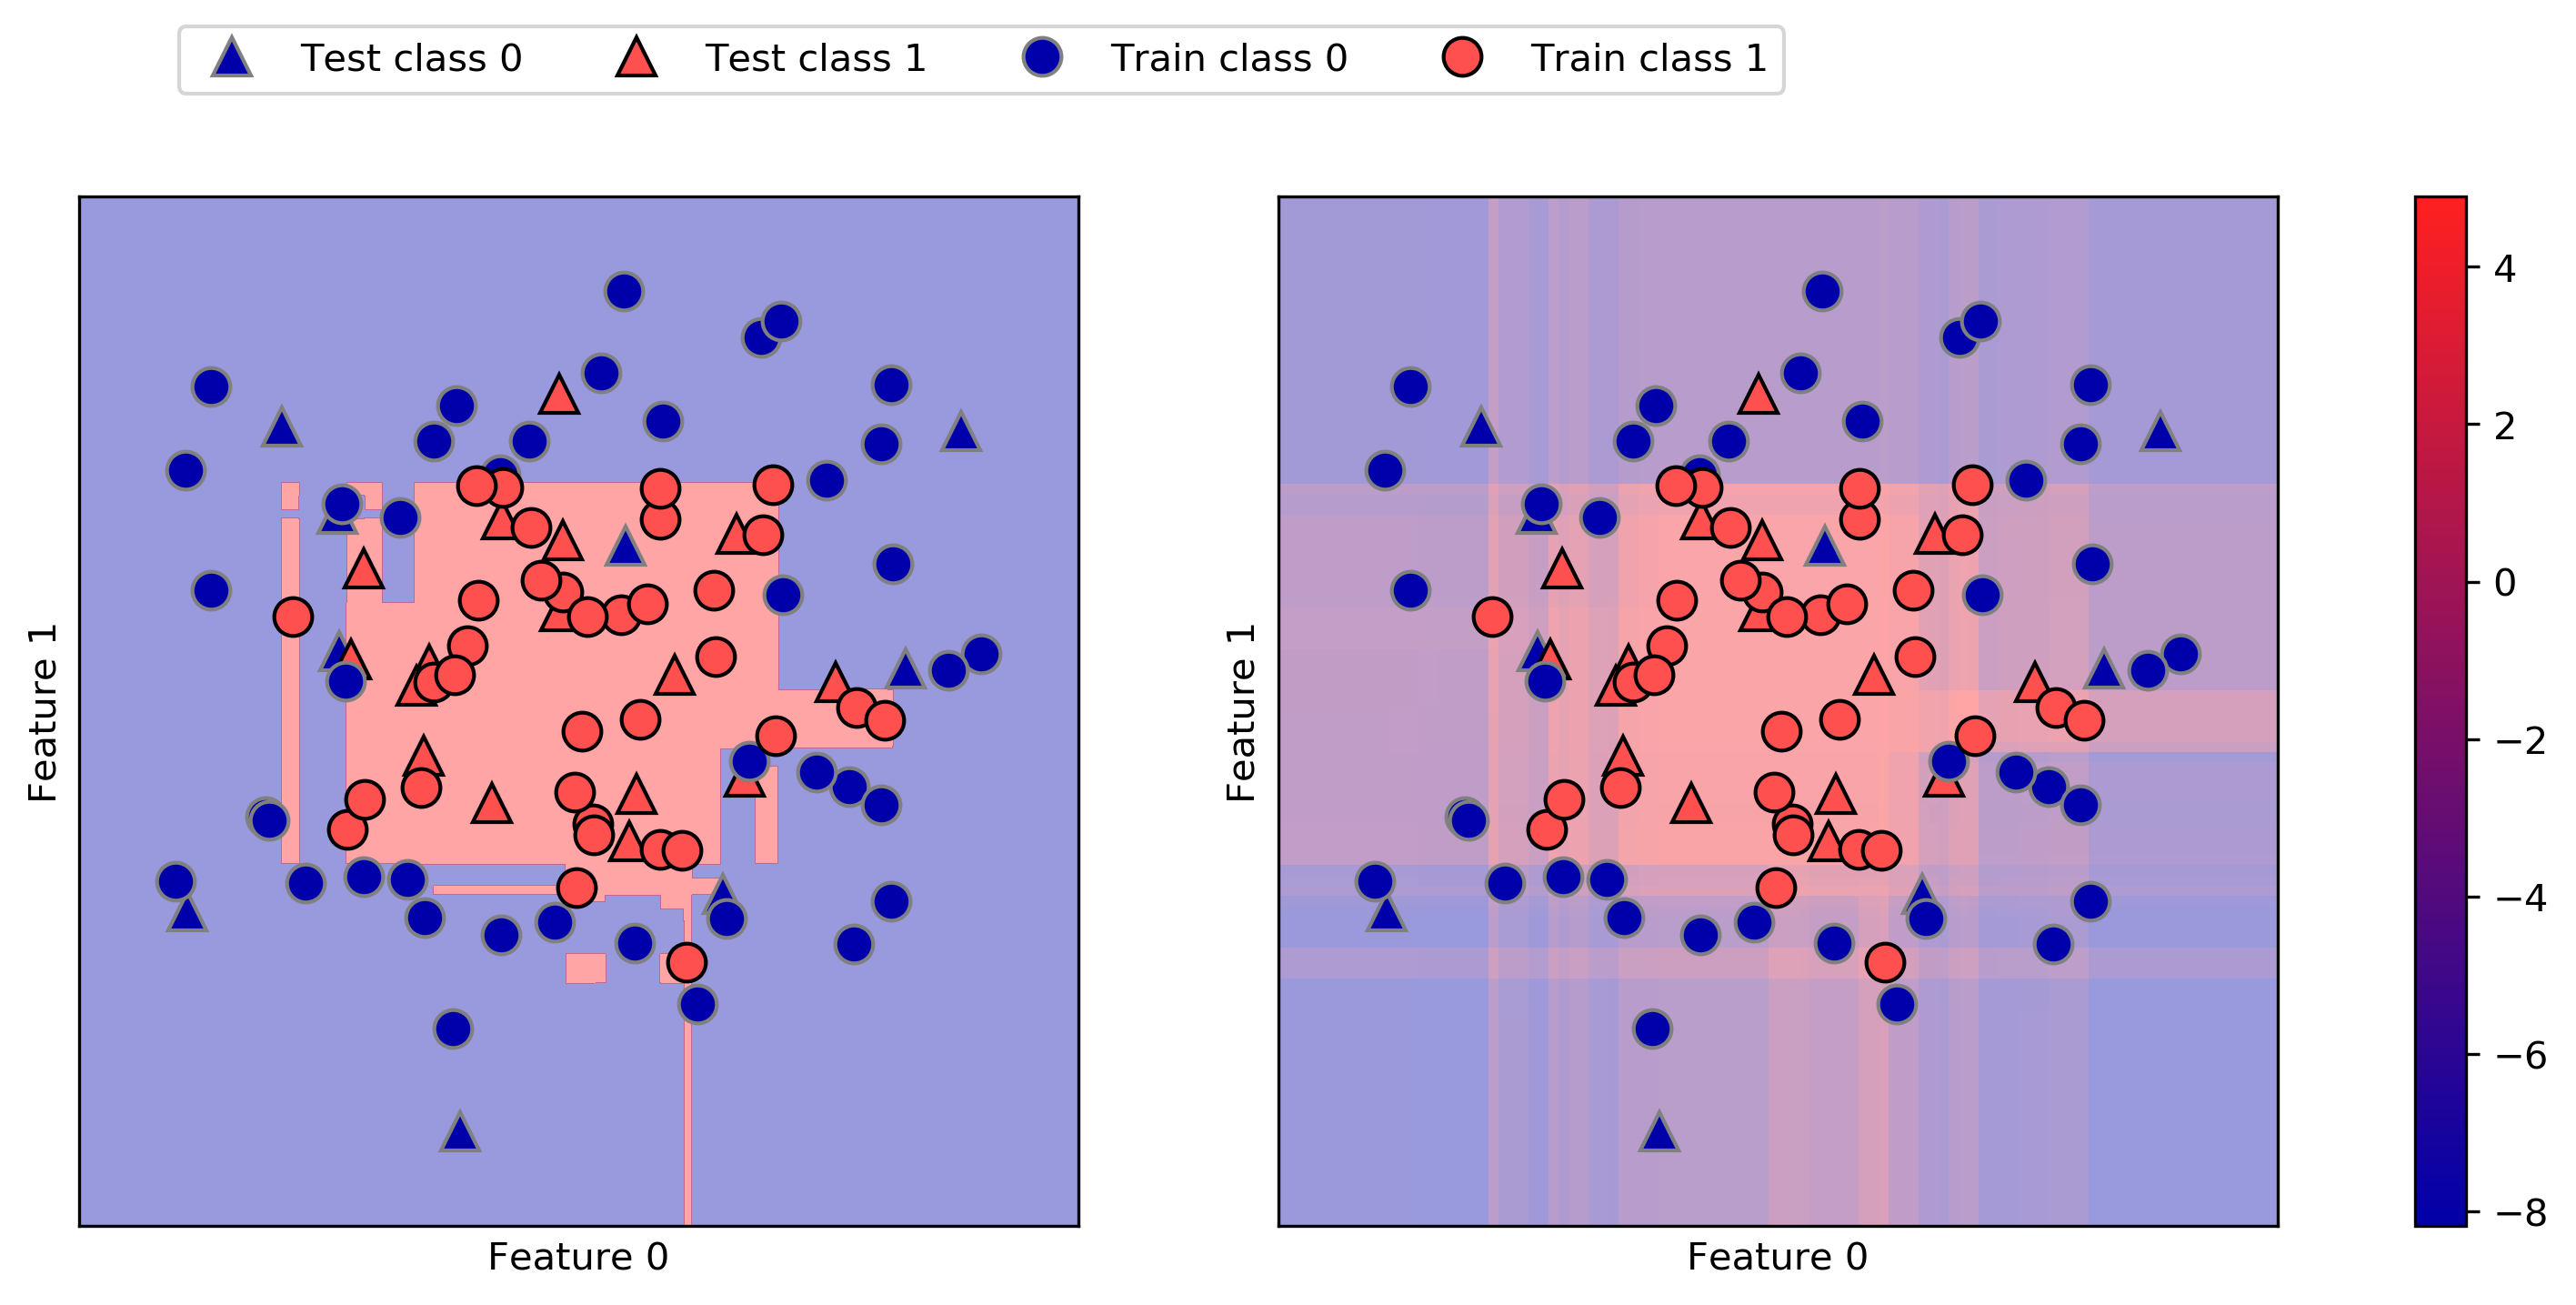

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))